In [18]:
import numpy as np
import mlrose 
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Part 1. 

### 1.1 The travelling salesperson problem
The travelling salesperson problem (TSP) is a classic optimization problem where the goal is to determine the shortest tour of a collection of n “cities” (i.e. nodes), starting and ending in the same city and visiting all of the other cities exactly once. In such a situation, a solution can be represented by a vector of n integers, each in the range 0 to n-1, specifying the order in which the cities should be visited.

In [136]:
def make_dist_list(n):
    d_list = []
    for i in range(n):
        for j in range(i+1, n):
            d_list.append((i,j, random.random() * 100))
    return d_list

In [137]:
# create the list of problem of different size for testing of the algorithms
random.seed(7)
prs = []
for size in [10, 20, 40]:
    prs.append((size,make_dist_list(size)))
    
    
    

In [138]:
prs[0]

(10,
 [(0, 1, 32.38327648331624),
  (0, 2, 15.084917392450192),
  (0, 3, 65.09344730398537),
  (0, 4, 7.243628666754276),
  (0, 5, 53.58820043066892),
  (0, 6, 36.56889169125856),
  (0, 7, 5.799892477470681),
  (0, 8, 50.743573318942026),
  (0, 9, 3.749565844198488),
  (1, 2, 43.364568366238586),
  (1, 3, 6.985542357461894),
  (1, 4, 9.071301334386506),
  (1, 5, 42.451918914251394),
  (1, 6, 82.68521246720381),
  (1, 7, 12.380196114964559),
  (1, 8, 22.323896460701455),
  (1, 9, 62.74332224055893),
  (2, 3, 94.77089424570056),
  (2, 4, 57.710294861749865),
  (2, 5, 39.66804746507802),
  (2, 6, 97.62551055929201),
  (2, 7, 4.658268061775628),
  (2, 8, 85.84684590486795),
  (2, 9, 28.960928633167626),
  (3, 4, 14.425508335743753),
  (3, 5, 11.779223807836836),
  (3, 6, 30.848182410193438),
  (3, 7, 81.61263591200314),
  (3, 8, 18.072637992393748),
  (3, 9, 58.16001636624662),
  (4, 5, 63.89134689261841),
  (4, 6, 37.23975427257312),
  (4, 7, 54.77444657095578),
  (4, 8, 6.278897497332315

In [185]:
#try randomized hill climbing, simulated annealing, a genetic algorithm, MIMIC
res_hill_cl = []
res_sim_ann = []
res_g_a = []
res_mimic = []
for p in prs:
    # randomized hill climbing
    fitness_dists = mlrose.TravellingSales(distances = p[1])

    # Define optimization problem object
    problem_fit = mlrose.TSPOpt(length = p[0], fitness_fn = fitness_dists, maximize=False)
    t = time.time()
    res_hill_cl.append((mlrose.random_hill_climb(problem_fit,random_state = 2, curve=True, max_attempts=int(p[0]/4)), time.time()-t))

    #simulated annealing
    fitness_dists = mlrose.TravellingSales(distances = p[1])
    problem_fit = mlrose.TSPOpt(length = p[0], fitness_fn = fitness_dists, maximize=False)
    t = time.time()
    res_sim_ann.append((mlrose.simulated_annealing(problem_fit,random_state = 2, curve=True,max_attempts=int(p[0]/4)), time.time()-t))
    
    # genetic algorithm
    fitness_dists = mlrose.TravellingSales(distances = p[1])
    problem_fit = mlrose.TSPOpt(length = p[0], fitness_fn = fitness_dists, maximize=False)
    t = time.time()
    res_g_a.append((mlrose.genetic_alg(problem_fit,random_state = 2, curve=True,max_attempts=int(p[0]/4)), time.time()-t))
    
    # MIMIC
    fitness_dists = mlrose.TravellingSales(distances = p[1])
    problem_fit = mlrose.TSPOpt(length = p[0], fitness_fn = fitness_dists, maximize=False)
    t = time.time()
    res_mimic.append((mlrose.mimic(problem_fit,random_state = 2, curve=True,max_attempts=int(p[0]/4),pop_size=p[0]*10), time.time()-t))
    
    

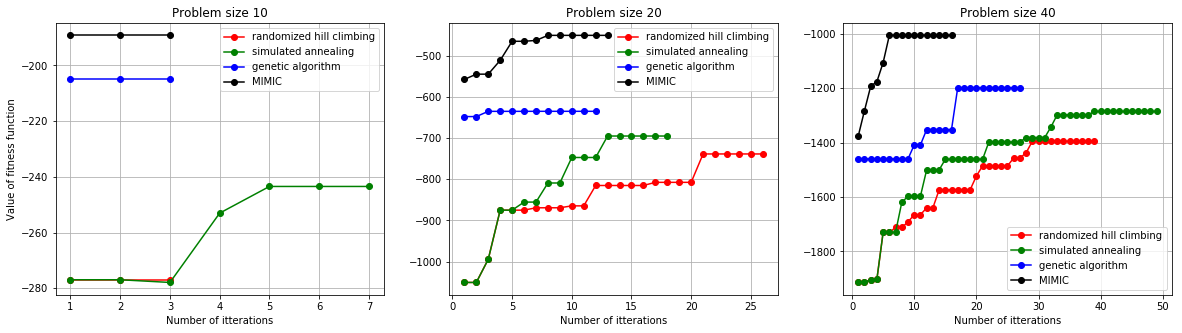

In [191]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title("Problem size 10")
axes[0].set_xlabel("Number of itterations")
axes[0].set_ylabel("Value of fitness function")
axes[0].grid()   
axes[0].plot(list(range(1, 1+len(res_hill_cl[0][0][2]))), res_hill_cl[0][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[0].plot(list(range(1, 1+len(res_sim_ann[0][0][2]))), res_sim_ann[0][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[0].plot(list(range(1, 1+len(res_g_a[0][0][2]))), res_g_a[0][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[0].plot(list(range(1, 1+len(res_mimic[0][0][2]))), res_mimic[0][0][2], 'o-', color="k",
                 label="MIMIC")


axes[0].legend(loc="best")


axes[1].set_title("Problem size 20")
axes[1].set_xlabel("Number of itterations")
axes[1].grid()    
axes[1].plot(list(range(1, 1+len(res_hill_cl[1][0][2]))), res_hill_cl[1][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[1].plot(list(range(1, 1+len(res_sim_ann[1][0][2]))), res_sim_ann[1][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[1].plot(list(range(1, 1+len(res_g_a[1][0][2]))), res_g_a[1][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[1].plot(list(range(1, 1+len(res_mimic[1][0][2]))), res_mimic[1][0][2], 'o-', color="k",
                 label="MIMIC")
axes[1].legend(loc="best")

axes[2].set_title("Problem size 40")
axes[2].set_xlabel("Number of itterations")
axes[2].grid() 
axes[2].plot(list(range(1, 1+len(res_hill_cl[2][0][2]))), res_hill_cl[2][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[2].plot(list(range(1, 1+len(res_sim_ann[2][0][2]))), res_sim_ann[2][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[2].plot(list(range(1, 1+len(res_g_a[2][0][2]))), res_g_a[2][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[2].plot(list(range(1, 1+len(res_mimic[2][0][2]))), res_mimic[2][0][2], 'o-', color="k",
                 label="MIMIC")
axes[2].legend(loc="best")





In [195]:
for r in res_hill_cl:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  276.9661222028541 best time  0.0007798671722412109
size 20 : best fitness  738.4159388669366 best time  0.023700952529907227
size 40 : best fitness  1395.5612919313626 best time  0.2506532669067383


In [196]:
for r in res_sim_ann:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  243.45514265488106 best time  0.00162506103515625
size 20 : best fitness  694.8148936639858 best time  0.017965078353881836
size 40 : best fitness  1285.8812233052822 best time  0.2710080146789551


In [197]:
for r in res_g_a:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  204.93897746544198 best time  0.13999724388122559
size 20 : best fitness  634.721898595643 best time  1.8709278106689453
size 40 : best fitness  1198.4136167900056 best time  26.78268599510193


In [ ]:
for r in res_mimic:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

In [198]:
for r in res_mimic:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  189.18544821760838 best time  0.399611234664917
size 20 : best fitness  450.045863267336 best time  15.177325010299683
size 40 : best fitness  1006.1776359157138 best time  274.3976061344147


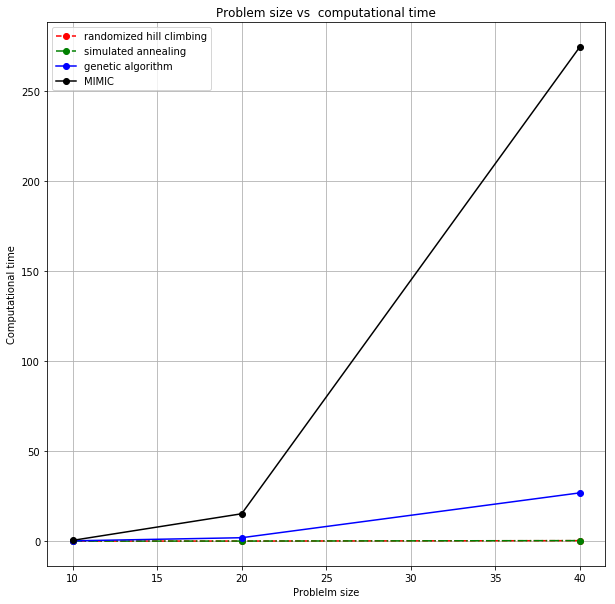

In [209]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Problem size vs  computational time")
axes.set_xlabel("Problelm size")
axes.set_ylabel("Computational time")
axes.grid()   
axes.plot([10,20,40], [res_hill_cl[0][1],res_hill_cl[1][1],res_hill_cl[2][1]], 'o--', color="r",
                 label="randomized hill climbing")
axes.plot([10,20,40], [res_sim_ann[0][1],res_sim_ann[1][1],res_sim_ann[2][1]], 'o-.', color="g",
                 label="simulated annealing")
axes.plot([10,20,40], [res_g_a[0][1],res_g_a[1][1],res_g_a[2][1]], 'o-', color="b",
                 label="genetic algorithm")
axes.plot([10,20,40], [res_mimic[0][1],res_mimic[1][1],res_mimic[2][1]], 'o-', color="k",
                 label="MIMIC")


axes.legend(loc="best")

### Part 1.2. Find the binary string with maximum numer of alterating of "0" and "1"

In [225]:
#try randomized hill climbing, simulated annealing, a genetic algorithm, MIMIC
res_hill_cl2 = []
res_sim_ann2 = []
res_g_a2 = []
res_mimic2 = []

pr_size = [10,20,40]
for p in pr_size:
    # randomized hill climbing
    fitness = mlrose.FlipFlop()

    # Define optimization problem object
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)
    t = time.time()
    res_hill_cl2.append((mlrose.random_hill_climb(problem_fit,random_state = 2, curve=True, max_attempts=int(p*2)), time.time()-t))

    #simulated annealing
    fitness = mlrose.FlipFlop()
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_sim_ann2.append((mlrose.simulated_annealing(problem_fit,random_state = 2, curve=True,max_attempts=int(p*2)), time.time()-t))
    
    # genetic algorithm
    fitness = mlrose.FlipFlop()
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_g_a2.append((mlrose.genetic_alg(problem_fit,random_state = 2, curve=True,max_attempts=int(p)), time.time()-t))
    
    # MIMIC
    fitness = mlrose.FlipFlop()
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_mimic2.append((mlrose.mimic(problem_fit,random_state = 2, curve=True,max_attempts=int(p),pop_size=p*10), time.time()-t))
    
    

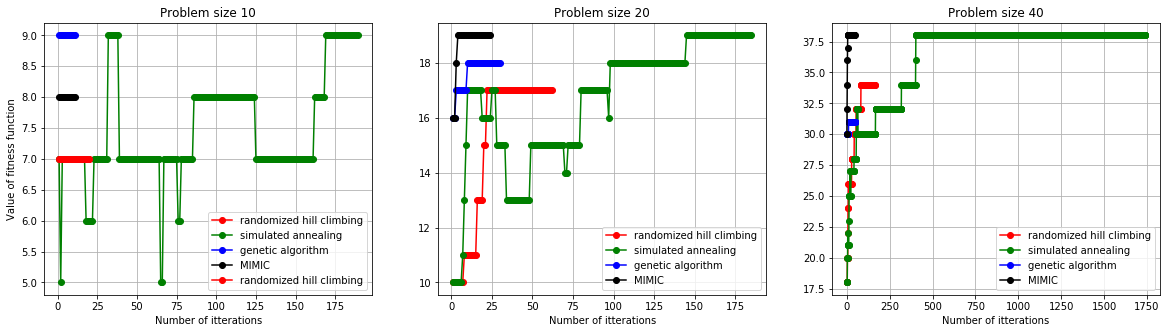

In [226]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title("Problem size 10")
axes[0].set_xlabel("Number of itterations")
axes[0].set_ylabel("Value of fitness function")
axes[0].grid()   
axes[0].plot(list(range(1, 1+len(res_hill_cl2[0][0][2]))), res_hill_cl2[0][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[0].plot(list(range(1, 1+len(res_sim_ann2[0][0][2]))), res_sim_ann2[0][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[0].plot(list(range(1, 1+len(res_g_a2[0][0][2]))), res_g_a2[0][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[0].plot(list(range(1, 1+len(res_mimic2[0][0][2]))), res_mimic2[0][0][2], 'o-', color="k",
                 label="MIMIC")
axes[0].plot(list(range(1, 1+len(res_hill_cl2[0][0][2]))), res_hill_cl2[0][0][2], 'o-', color="r",
                 label="randomized hill climbing")


axes[0].legend(loc="best")


axes[1].set_title("Problem size 20")
axes[1].set_xlabel("Number of itterations")
axes[1].grid()    
axes[1].plot(list(range(1, 1+len(res_hill_cl2[1][0][2]))), res_hill_cl2[1][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[1].plot(list(range(1, 1+len(res_sim_ann2[1][0][2]))), res_sim_ann2[1][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[1].plot(list(range(1, 1+len(res_g_a2[1][0][2]))), res_g_a2[1][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[1].plot(list(range(1, 1+len(res_mimic2[1][0][2]))), res_mimic2[1][0][2], 'o-', color="k",
                 label="MIMIC")
axes[1].legend(loc="best")

axes[2].set_title("Problem size 40")
axes[2].set_xlabel("Number of itterations")
axes[2].grid() 
axes[2].plot(list(range(1, 1+len(res_hill_cl2[2][0][2]))), res_hill_cl2[2][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[2].plot(list(range(1, 1+len(res_sim_ann2[2][0][2]))), res_sim_ann2[2][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[2].plot(list(range(1, 1+len(res_g_a2[2][0][2]))), res_g_a2[2][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[2].plot(list(range(1, 1+len(res_mimic2[2][0][2]))), res_mimic2[2][0][2], 'o-', color="k",
                 label="MIMIC")
axes[2].legend(loc="best")



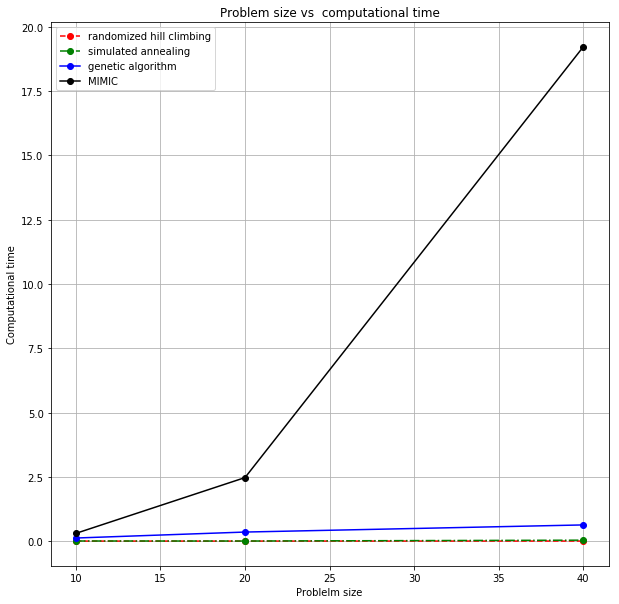

In [227]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Problem size vs  computational time")
axes.set_xlabel("Problelm size")
axes.set_ylabel("Computational time")
axes.grid()   
axes.plot([10,20,40], [res_hill_cl2[0][1],res_hill_cl2[1][1],res_hill_cl2[2][1]], 'o--', color="r",
                 label="randomized hill climbing")
axes.plot([10,20,40], [res_sim_ann2[0][1],res_sim_ann2[1][1],res_sim_ann2[2][1]], 'o-.', color="g",
                 label="simulated annealing")
axes.plot([10,20,40], [res_g_a2[0][1],res_g_a2[1][1],res_g_a2[2][1]], 'o-', color="b",
                 label="genetic algorithm")
axes.plot([10,20,40], [res_mimic2[0][1],res_mimic2[1][1],res_mimic2[2][1]], 'o-', color="k",
                 label="MIMIC")


axes.legend(loc="best")

In [228]:
for r in res_hill_cl2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  7.0 best time  0.00043487548828125
size 20 : best fitness  17.0 best time  0.0007171630859375
size 40 : best fitness  34.0 best time  0.002622842788696289


In [229]:
for r in res_sim_ann2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  9.0 best time  0.004634857177734375
size 20 : best fitness  19.0 best time  0.0030450820922851562
size 40 : best fitness  38.0 best time  0.036354780197143555


In [230]:
for r in res_g_a2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  9.0 best time  0.12000322341918945
size 20 : best fitness  18.0 best time  0.3519608974456787
size 40 : best fitness  31.0 best time  0.6292128562927246


In [231]:
for r in res_mimic2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  8.0 best time  0.30156707763671875
size 20 : best fitness  19.0 best time  2.470693826675415
size 40 : best fitness  38.0 best time  19.22277808189392


### Part 1.3 Product of Sums of Consecutive Ones (Generic Alg)

We want to find the binary string to maximize product of sums of consecutive ones. For example: 1010 = 1*1 = 1, but 1101 = 2*1=2

In [241]:
# custom fitness function
def pr_of_cons_ones(state):
    my_ints = [0]
    last = 0
    for s in state:
        if s == 1:
            if last == 1:
                my_ints[-1] +=1
            else:
                my_ints.append(1)
            last = 1
        else:
            last = 0
    if sum(my_ints) == 0:
        return 0
    else:
        res = 1
        for i in my_ints:
            if i != 0:
                res *=i
        return res


In [240]:
pr_of_cons_ones([0,1,1,1,0,1,1,1,1,0,0,0])

12

In [251]:
#try randomized hill climbing, simulated annealing, a genetic algorithm, MIMIC
res_hill_cl2 = []
res_sim_ann2 = []
res_g_a2 = []
res_mimic2 = []

pr_size = [10,20,40]
for p in pr_size:
    # randomized hill climbing
    fitness = mlrose.CustomFitness(pr_of_cons_ones)

    # Define optimization problem object
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)
    t = time.time()
    res_hill_cl2.append((mlrose.random_hill_climb(problem_fit,random_state = 2, curve=True, max_attempts=int(p*2)), time.time()-t))

    #simulated annealing
    fitness = mlrose.CustomFitness(pr_of_cons_ones)
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_sim_ann2.append((mlrose.simulated_annealing(problem_fit,random_state = 2, curve=True,max_attempts=int(p*2)), time.time()-t))
    
    # genetic algorithm
    fitness = mlrose.CustomFitness(pr_of_cons_ones)
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_g_a2.append((mlrose.genetic_alg(problem_fit,random_state = 2, curve=True,max_attempts=int(p),pop_size=p*10,mutation_prob=0.01), time.time()-t))
    
    # MIMIC
    fitness = mlrose.CustomFitness(pr_of_cons_ones)
    problem_fit = mlrose.DiscreteOpt(length = p, fitness_fn = fitness, maximize=True)    
    t = time.time()
    res_mimic2.append((mlrose.mimic(problem_fit,random_state = 2, curve=True,max_attempts=int(p),pop_size=p*10), time.time()-t))
    
    

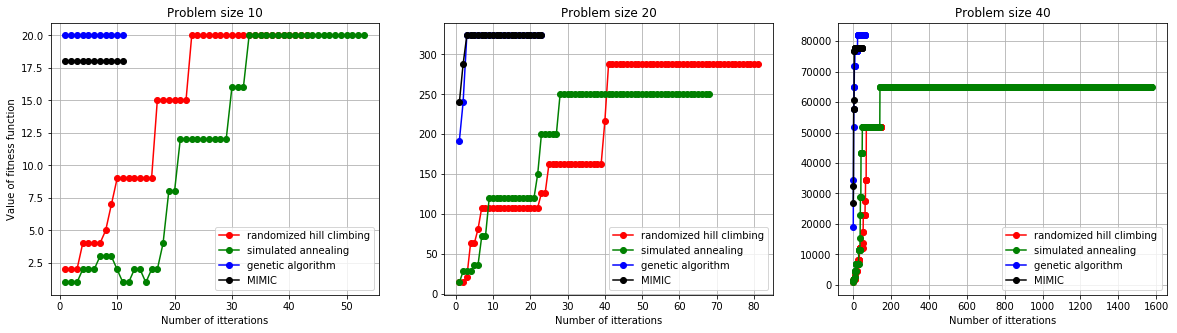

In [252]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].set_title("Problem size 10")
axes[0].set_xlabel("Number of itterations")
axes[0].set_ylabel("Value of fitness function")
axes[0].grid()   
axes[0].plot(list(range(1, 1+len(res_hill_cl2[0][0][2]))), res_hill_cl2[0][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[0].plot(list(range(1, 1+len(res_sim_ann2[0][0][2]))), res_sim_ann2[0][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[0].plot(list(range(1, 1+len(res_g_a2[0][0][2]))), res_g_a2[0][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[0].plot(list(range(1, 1+len(res_mimic2[0][0][2]))), res_mimic2[0][0][2], 'o-', color="k",
                 label="MIMIC")


axes[0].legend(loc="best")


axes[1].set_title("Problem size 20")
axes[1].set_xlabel("Number of itterations")
axes[1].grid()    
axes[1].plot(list(range(1, 1+len(res_hill_cl2[1][0][2]))), res_hill_cl2[1][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[1].plot(list(range(1, 1+len(res_sim_ann2[1][0][2]))), res_sim_ann2[1][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[1].plot(list(range(1, 1+len(res_g_a2[1][0][2]))), res_g_a2[1][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[1].plot(list(range(1, 1+len(res_mimic2[1][0][2]))), res_mimic2[1][0][2], 'o-', color="k",
                 label="MIMIC")
axes[1].legend(loc="best")

axes[2].set_title("Problem size 40")
axes[2].set_xlabel("Number of itterations")
axes[2].grid() 
axes[2].plot(list(range(1, 1+len(res_hill_cl2[2][0][2]))), res_hill_cl2[2][0][2], 'o-', color="r",
                 label="randomized hill climbing")
axes[2].plot(list(range(1, 1+len(res_sim_ann2[2][0][2]))), res_sim_ann2[2][0][2], 'o-', color="g",
                 label="simulated annealing")
axes[2].plot(list(range(1, 1+len(res_g_a2[2][0][2]))), res_g_a2[2][0][2], 'o-', color="b",
                 label="genetic algorithm")
axes[2].plot(list(range(1, 1+len(res_mimic2[2][0][2]))), res_mimic2[2][0][2], 'o-', color="k",
                 label="MIMIC")
axes[2].legend(loc="best")




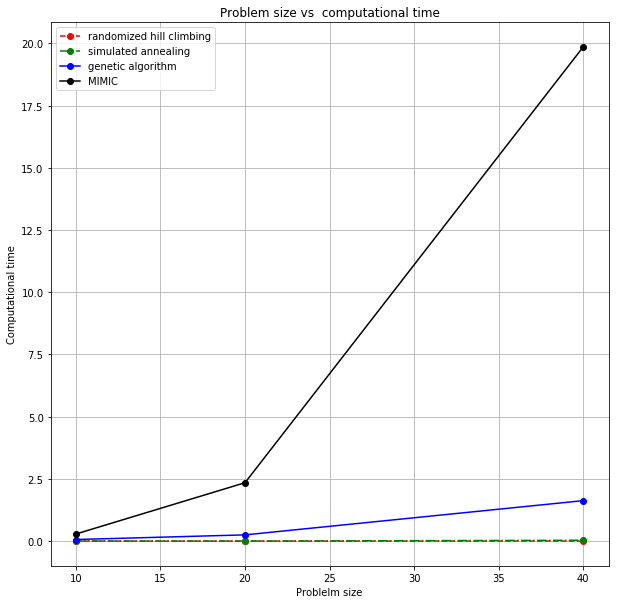

In [253]:
_, axes = plt.subplots(1, 1, figsize=(10, 10))
axes.set_title("Problem size vs  computational time")
axes.set_xlabel("Problelm size")
axes.set_ylabel("Computational time")
axes.grid()   
axes.plot([10,20,40], [res_hill_cl2[0][1],res_hill_cl2[1][1],res_hill_cl2[2][1]], 'o--', color="r",
                 label="randomized hill climbing")
axes.plot([10,20,40], [res_sim_ann2[0][1],res_sim_ann2[1][1],res_sim_ann2[2][1]], 'o-.', color="g",
                 label="simulated annealing")
axes.plot([10,20,40], [res_g_a2[0][1],res_g_a2[1][1],res_g_a2[2][1]], 'o-', color="b",
                 label="genetic algorithm")
axes.plot([10,20,40], [res_mimic2[0][1],res_mimic2[1][1],res_mimic2[2][1]], 'o-', color="k",
                 label="MIMIC")


axes.legend(loc="best")

In [254]:
for r in res_sim_ann2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  20.0 best time  0.0018630027770996094
size 20 : best fitness  250.0 best time  0.0018281936645507812
size 40 : best fitness  64800.0 best time  0.035195112228393555


In [255]:
for r in res_sim_ann2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  20.0 best time  0.0018630027770996094
size 20 : best fitness  250.0 best time  0.0018281936645507812
size 40 : best fitness  64800.0 best time  0.035195112228393555


In [256]:
for r in res_g_a2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  20.0 best time  0.06410908699035645
size 20 : best fitness  324.0 best time  0.2508821487426758
size 40 : best fitness  81920.0 best time  1.6261577606201172


In [257]:
for r in res_mimic2:
    print("size", len(r[0][0]),": best fitness ",r[0][1], "best time ", r[1] )

size 10 : best fitness  18.0 best time  0.2864711284637451
size 20 : best fitness  324.0 best time  2.3470089435577393
size 40 : best fitness  77760.0 best time  19.86029291152954


Hill climbing attempts to find an optimal solution by following the gradient of the error function. It is prone to finding locally optimal solutions rather than globally optional solutions. On some error surfaces, the error function is not well behaved and so it will not work well.

Simulated annealing is modeled after a physical process when has a better chance of finding a near optimal global solution. In the beginning major jumps can occur in the search, but as the search progresses, smaller and smaller jumps are made. If “cooled” sufficiently slowly, that has a very good chance of finding an optimal solution.

If the problem has only one optimal solution ( Unimodal) then, SA and GA can be applied. If the problem has more than one optimal solution, GA will find solutions better than SA

## Part 2

In [260]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [261]:
# I used this model: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
# This model optimizes the log-loss function 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [262]:
from imblearn.under_sampling import RandomUnderSampler

In [263]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [268]:
# we will take train dataset from Kaggle and split it into train/ test (we cannot use test dataset from Kaggle
# since it has no labels)
all_data = pd.read_csv("tweets.csv")

In [269]:
all_data = all_data.fillna("")

# let's append keyword and lockation to the text:
def concat(a, b, c):
    return a + " " + b + " " + c

all_data['full_text'] = all_data.apply(lambda x: concat(x['keyword'], x['location'], x['text']), axis=1)
all_data = all_data.sample(frac=1)

# this function was taken from https://www.kaggle.com/adinishad/nlp-80-accuracy
def clean_data(my_text):
    # Replace email addresses with 'email'
    processed = my_text.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                     'emailaddress')

    # Replace URLs with 'webaddress'
    processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                      'webaddress')

    # Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    processed = processed.str.replace(r'£|\$', 'moneysymb')

    # Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                      'phonenumbr')

    # Replace numbers with 'numbr'
    processed = processed.str.replace(r'\d+(\.\d+)?', 'numbr')

    # Remove punctuation
    processed = processed.str.replace(r'[^\w\d\s]', ' ')

    # Replace whitespace between terms with a single space
    processed = processed.str.replace(r'\s+', ' ')

    # Remove leading and trailing whitespace
    processed = processed.str.replace(r'^\s+|\s+?$', '')

    # change words to lower case - Hello, HELLO, hello are all the same word
    processed = processed.str.lower()
    
    # remove stop words
    stop_words = set(stopwords.words("english"))
    processed = processed.apply(lambda x:" ".join(term for term in word_tokenize(x) if term not in stop_words))
    
    # stemming
    ps = PorterStemmer()
    processed = processed.apply(lambda x:" ".join([ps.stem(word) for word in x.split()]))
    
    # lemmatization
    wl = WordNetLemmatizer()
    processed = processed.apply(lambda x:" ".join([wl.lemmatize(word) for word in x.split()]))
    
    
    return processed

all_data_clean = clean_data(all_data["full_text"])

In [270]:
all_data["clean_text"] = all_data_clean

seed = 7

X = all_data.clean_text
y = all_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [271]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=300) # limit number of features to avoid overfitting
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [272]:
X_train.shape

(6090, 300)

In [273]:
y_train.shape

(6090,)

In [274]:
X_test.shape

(1523, 300)

In [275]:
# it is recomended to use scaled data for mlrose. I will use the scaled data for NN with original alrogithm and 
# for RO algorithms. I aslo found that mlrose random optimization works very bad when we have unbalanced data,
# thus, I will use downsampling to have the same number of positive and negative samples in the training set

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.todense())
X_test_scaled = scaler.transform(X_test.todense())

y_train = y_train.values
y_test = y_test.values


rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X_train_scaled, y_train)

In [276]:
X_rus.shape

(5256, 300)

### Original NN

In [277]:
layer_1 = [2, 3, 4, 5]
layer_2 = [2, 3, 4, 5]

for i in layer_1:
    for j in layer_2:
        #hidden_layer_sizes:  The ith element represents the number of neurons in the ith hidden layer.
        clf = MLPClassifier(solver='sgd', alpha=0, hidden_layer_sizes=(i, j), random_state=1) 
        scores = cross_val_score(clf, X_rus, y_rus, cv=5, scoring='accuracy')
        print(" layer_1: ", i, "layer_2: ", j,  " accuracy: ", np.median(scores))

 layer_1:  2 layer_2:  2  accuracy:  0.7247619047619047
 layer_1:  2 layer_2:  3  accuracy:  0.56
 layer_1:  2 layer_2:  4  accuracy:  0.700952380952381
 layer_1:  2 layer_2:  5  accuracy:  0.5
 layer_1:  3 layer_2:  2  accuracy:  0.5
 layer_1:  3 layer_2:  3  accuracy:  0.5
 layer_1:  3 layer_2:  4  accuracy:  0.49334600760456276
 layer_1:  3 layer_2:  5  accuracy:  0.5161596958174905
 layer_1:  4 layer_2:  2  accuracy:  0.5237642585551331
 layer_1:  4 layer_2:  3  accuracy:  0.5114068441064639
 layer_1:  4 layer_2:  4  accuracy:  0.723384030418251
 layer_1:  4 layer_2:  5  accuracy:  0.5180608365019012
 layer_1:  5 layer_2:  2  accuracy:  0.5
 layer_1:  5 layer_2:  3  accuracy:  0.6685714285714286
 layer_1:  5 layer_2:  4  accuracy:  0.52
 layer_1:  5 layer_2:  5  accuracy:  0.6673003802281369


In [278]:
# predict on the test data using the best parameters
clf = MLPClassifier(solver='sgd', alpha=0, hidden_layer_sizes=(2,2), random_state=1) 
clf.fit(X_rus, y_rus)
print("Training accuracy: ", accuracy_score(y_rus, clf.predict(X_rus)))
pr = clf.predict(X_test)
print("Testing accuracy: ", accuracy_score(y_test, pr))

Training accuracy:  0.758751902587519
Testing accuracy:  0.7347340774786605


In [372]:
start_train = time.time()
nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='gradient_descent',
                                             max_iters=1500,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=0.001,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model1.fit(X_rus, y_rus)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  13.48700499534607
0.7745433789954338
0.7183191070256073


In [378]:
start_train = time.time()
nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[2],
                                             activation='relu',
                                             algorithm='gradient_descent',
                                             max_iters=1500,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=0.001,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model1.fit(X_rus, y_rus)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  14.002008199691772
0.795662100456621
0.726854891661195


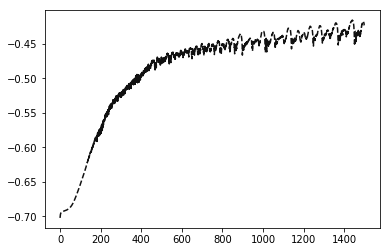

In [379]:
plt.plot(nn_model1.fitness_curve, '--', color="#111111",  label="Log loss")

### NN with RO: randomized hill climbing

In [439]:
start_train = time.time()
nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='random_hill_climb',
                                             max_iters=15000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=1,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model1.fit(X_rus, y_rus)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  56.69526410102844
0.7943302891933028
0.7255416940249507


In [304]:
start_train = time.time()
nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='random_hill_climb',
                                             max_iters=15000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=1,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model1.fit(X_rus, y_rus)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  53.68407583236694
0.7943302891933028
0.7255416940249507


In [440]:
nn_model1.fitted_weights

array([-1.89840419,  1.41629565, -0.41819052,  0.02165521,  0.78589391,
        0.79258618, -0.74882938, -0.58551424, -0.89706559, -2.11838031,
       -5.        , -0.08633355,  1.2982881 ,  0.55697457,  0.3525098 ,
        3.18172563,  2.04796376, -3.88229182,  2.51850489,  2.83020239,
       -1.43294984,  1.38627584, -2.11909256, -0.68626452, -3.91070196,
       -1.43937047,  0.61272706, -0.55608423,  3.77594252,  1.8727673 ,
        0.95199084,  2.34476735,  3.80566822, -0.30849826,  0.75598808,
       -3.81556598, -0.69317819,  0.11568152, -0.27687047, -1.54989099,
       -1.18696017, -2.0621195 ,  0.53847116, -1.41641445,  0.9153728 ,
       -1.27893217,  2.17250581,  0.56697572, -0.44404499, -1.09075585,
        0.41082069, -1.59724258, -1.97192988,  0.17445874, -0.03282894,
        1.72435242, -1.58462676,  1.49349245, -1.61781416,  4.37836083,
       -4.25279975,  1.33626961,  1.67969733,  1.14558774, -0.34838568,
        0.8902901 , -5.        ,  1.48535084,  1.94320521,  3.46

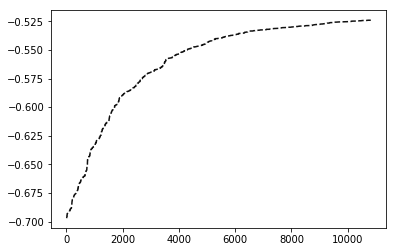

In [441]:
plt.plot(nn_model1.fitness_curve, '--', color="#111111",  label="Log loss")

### NN with RO: simulated_annealing

In [456]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model1 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='simulated_annealing',
                                             max_iters=1500,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=10,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             max_attempts=100)
nn_model1.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model1.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  12.343760013580322
0.6225266362252664
0.6513460275771503


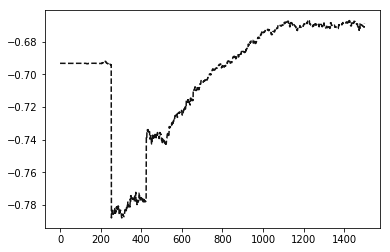

In [457]:
plt.plot(nn_model1.fitness_curve, '--', color="#111111",  label="Log loss")

### Genetic algorithm

In [501]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model3 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=10,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.1,
                                             max_attempts=20)
nn_model3.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  62.73519802093506
0.5270167427701674
0.5830597504924491


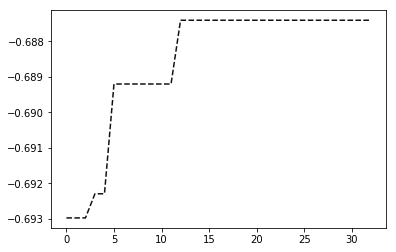

In [502]:
plt.plot(nn_model3.fitness_curve, '--', color="#111111",  label="Log loss")

In [503]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model3 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=1,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.1,
                                             max_attempts=20)
nn_model3.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  62.897687911987305
0.5270167427701674
0.5830597504924491


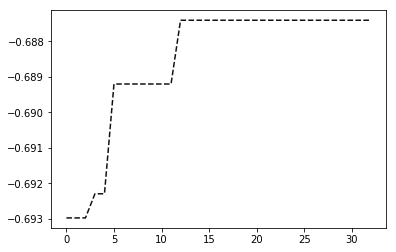

In [504]:
plt.plot(nn_model3.fitness_curve, '--', color="#111111",  label="Log loss")

In [505]:
random.seed(7)
init_weights=np.random.uniform(-0.1, 0.1, 608)
start_train = time.time()
nn_model3 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=3000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=1,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=600,mutation_prob=0.1,
                                             max_attempts=20)
nn_model3.fit(X_rus, y_rus, init_weights=init_weights)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  58.431992053985596
0.5
0.5778069599474721


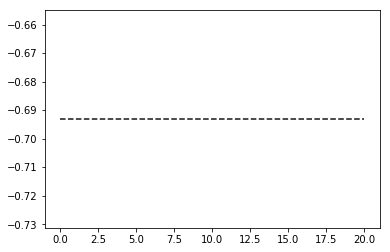

In [506]:
plt.plot(nn_model3.fitness_curve, '--', color="#111111",  label="Log loss")

In [367]:
start_train = time.time()
nn_model3 = mlrose.NeuralNetwork(hidden_nodes=[2,2],
                                             activation='relu',
                                             algorithm='genetic_alg',
                                             max_iters=20000,
                                             bias=True,
                                             is_classifier=True,
                                             learning_rate=0.01,
                                             early_stopping=True,
                                             clip_max=5,
                                             random_state = 3,
                                             curve=True,
                                             pop_size=400,mutation_prob=0.1,
                                             max_attempts=20)
nn_model3.fit(X_rus, y_rus)
print("training time: ", time.time() - start_train)
y_train_pred = nn_model3.predict(X_rus)
y_train_accuracy = accuracy_score(y_rus, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test, y_test_pred)
print(y_test_accuracy)

training time:  58.51868176460266
0.5270167427701674
0.5830597504924491


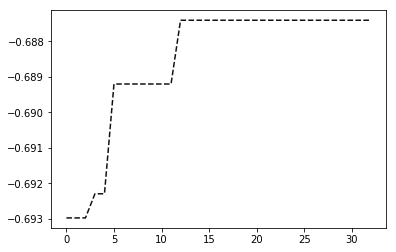

In [368]:
plt.plot(nn_model3.fitness_curve, '--', color="#111111",  label="Log loss")

In [369]:
nn_model3.loss

0.6874036618192435

In [371]:
nn_model3.fitted_weights.shape

(608,)

8-Queens

In chess, the queen is the most powerful piece on the board. It can attack any piece in the same row, column or diagonal. In the 8-Queens problem, you are given a chessboard with eight queens (and no other pieces) and the aim is to place the queens on the board so that none of them can attack each other (Russell and Norvig (2010).

Clearly, in an optimal solution to this problem, there will be exactly one queen in each column. So, we only need to determine the row position of each queen, and we can define the state vector for this problem as x = [x_{0}, x_{1}, x_{2}, x_{3}, x_{4}, x_{5}, x_{6}, x_{7}], where x_{i} denotes the row position of the queen in column i (for i = 0, 1, …, 7).

In [44]:
# evaluating the number of pairs of attacking queens for a given state and try to minimize this function
fitness = mlrose.Queens()

# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

    # Initialize counter
    fitness_cnt = 0
    
    n = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
            for j in range(i + 1, len(state)):
                n+=1

                # Check for horizontal, diagonal-up and diagonal-down attacks
                if (state[j] != state[i]) \
                    and (state[j] != state[i] + (j - i)) \
                    and (state[j] != state[i] - (j - i)):

                   # If no attacks, then increment counter
                   fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

In [45]:
problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness_cust, maximize = True, max_val = 8)

In [46]:
#problem = mlrose.DiscreteOpt(length = 8, fitness_fn = fitness, maximize = False, max_val = 8)

In [47]:
#random_hill_climb(problem, max_attempts=10, max_iters=inf, restarts=0, init_state=None, curve=False, random_state=None)
# Define decay schedule
schedule = mlrose.ExpDecay()

# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Solve problem using simulated annealing
best_state, best_fitness, curve = mlrose.random_hill_climb(problem, 
                                                      max_attempts = 100, max_iters = 1000,
                                                      init_state = init_state,curve=True, random_state = 1)


print(best_fitness)

27.0


In [48]:
curve

array([ 5., 10., 13., 17., 17., 19., 19., 19., 19., 19., 19., 19., 19.,
       19., 19., 19., 21., 21., 21., 23., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 25., 25., 25., 25., 25., 26., 26., 26., 26.,
       26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26.,
       26., 26., 26., 26., 26., 26., 26., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27.])

In [49]:
# Define decay schedule
schedule = mlrose.ExpDecay()

# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Solve problem using simulated annealing
best_state, best_fitness, curve = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = 100, max_iters = 1000,curve=True,
                                                      init_state = init_state, random_state = 1)


print(best_fitness)

28.0


In [50]:
curve

array([ 5., 10., 13., 17., 17., 18., 19., 20., 20., 20., 20., 21., 22.,
       23., 23., 23., 23., 23., 24., 24., 24., 24., 24., 21., 21., 23.,
       23., 23., 23., 23., 24., 24., 24., 24., 24., 25., 25., 25., 25.,
       25., 25., 24., 24., 24., 25., 25., 25., 25., 25., 25., 27., 26.,
       26., 26., 26., 24., 25., 25., 25., 25., 26., 26., 26., 25., 25.,
       25., 25., 25., 25., 25., 25., 24., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25., 25.,
       25., 25., 25., 25., 25., 25., 24., 24., 24., 24., 24., 24., 24.,
       25., 24., 24., 24., 23., 23., 25., 25., 25., 24., 24., 25., 25.,
       24., 24., 24., 24., 24., 24., 25., 25., 26., 26., 26., 26., 26.,
       26., 26., 26., 26., 26., 26., 26., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 28., 26., 26.,
       26., 26., 26., 26., 26., 26., 25., 25., 25., 25., 26., 26

In [51]:
# genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=10, max_iters=inf, curve=False, random_state=None)
best_state, best_fitness, curve = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1,
                                                      max_attempts = 100, max_iters = 1000,curve=True,
                                                      random_state = 1)


print(best_fitness)

27.0


In [52]:
curve

array([26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26.,
       26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26.,
       26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26.,
       26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27.])

In [53]:
# mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=inf, curve=False, random_state=None, fast_mimic=False)
best_state, best_fitness, curve = mlrose.mimic(problem, pop_size=200, keep_pct=0.2,
                                                      max_attempts = 100, max_iters = 1000,curve=True,
                                                      random_state = 1, fast_mimic=True)


print(best_fitness)

27.0


In [54]:
curve

array([27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27., 27.,
       27., 27., 27., 27., 27., 27., 27., 27., 27., 27.])

In [2]:
Define a fitness function object.
Define an optimization problem object.
Select and run a randomized optimization algorithm.


The following command must be run outside of the IPython shell:

    $ pip install mlrose

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


## Part 2. NN optimization